## Knapsack problem

In [3]:
import random
from prettytable import PrettyTable
import numpy as np
import math 
import matplotlib.pyplot as plt

In [4]:

n_items = 20
area = 50

prices = [random.randint(1, area) for _ in range(n_items)]
weights = [random.randint(1, area) for _ in range(n_items)]

tbl = PrettyTable()
tbl.field_names = ["ID","Prices", "Weight"]

for i in range(n_items):
    tbl.add_row([i, prices[i], weights[i]])

tbl.add_row(["---","------", "------"])
tbl.add_row(["Suma", sum(prices), sum(weights)])
print(tbl)



+------+--------+--------+
|  ID  | Prices | Weight |
+------+--------+--------+
|  0   |   40   |   1    |
|  1   |   48   |   38   |
|  2   |   27   |   9    |
|  3   |   24   |   12   |
|  4   |   10   |   45   |
|  5   |   20   |   35   |
|  6   |   3    |   16   |
|  7   |   42   |   13   |
|  8   |   37   |   42   |
|  9   |   39   |   17   |
|  10  |   27   |   36   |
|  11  |   38   |   16   |
|  12  |   10   |   7    |
|  13  |   26   |   27   |
|  14  |   24   |   45   |
|  15  |   26   |   44   |
|  16  |   13   |   1    |
|  17  |   6    |   36   |
|  18  |   23   |   17   |
|  19  |   40   |   9    |
| ---  | ------ | ------ |
| Suma |  523   |  466   |
+------+--------+--------+


### Brute Force

In [6]:
def knapsack_brute_force(prices, weights, max_weight):
    n_products = len(prices)
    best_value = 0
    best_combination = []
    weights_of_b_comb = []
    history = []

    for i in range(2 ** n_products):
        combination = []
        total_weight = 0
        total_value = 0

        for j in range(n_products):
            if (i >> j) & 1:
                combination.append(j)
                total_weight += weights[j]
                total_value += prices[j]
                
        
        if total_weight <= max_weight and total_value > best_value:
            best_value = total_value
            best_combination = combination           
            weights_of_b_comb = weights
            history.append(best_value)
    return history, best_value, best_combination, weights_of_b_comb



### Simulated annealing

In [7]:
def generate_starting_vector(weights, max_weight):
    starting_vector = []
    total_weight = 0
    n_items = len(weights)

    for i in range(n_items*2):
        index = random.randint(0, n_items - 1)  # Vyber náhodný index produktu
        if index not in starting_vector:
            new_weight = total_weight + weights[index]
            if new_weight <= max_weight:
                starting_vector.append(index)
                total_weight = new_weight
    return starting_vector

def count_total_price(current_solution):
    total_price = 0
    for index in current_solution:
        total_price += prices[index]
    return total_price

def count_total_weight(current_solution):
    total_weight = 0
    for index in current_solution:
        total_weight += weights[index]
    return total_weight

def generate_neighbor(current_solution, prices, max_weight):
    neighbour = []
    n_items= len(prices)
    total_weight = count_total_weight(current_solution) # 20

    neighbour = current_solution.copy()
    index = random.randint(0, n_items - 1)  # Vyber náhodný index produktu
    if index not in neighbour:
            new_weight = total_weight + weights[index] # 24
            if new_weight <= max_weight:
                neighbour.append(index)
    elif index in neighbour: #pokud je index v reseni
            neighbour.remove(index)

    return neighbour


def knapsack_simulated_annealing(n_iterations, max_weight, prices, weights, n_metropolis, max_temp, min_temp, cooling_decr):
    starting_vector = generate_starting_vector(weights, max_weight)
    current_solution = starting_vector #indexes of products
    best_combination = []
    total_price = count_total_price(current_solution)
    history = []

    current_fitness = total_price
    best_fitness = current_fitness
    history.append(current_fitness)
    T = max_temp

    for i in range(n_iterations):

        for _ in range(n_iterations):   #volani metropolise 
            neighbour = generate_neighbor(current_solution, prices, max_weight)
            neighbour_fitness = count_total_price(neighbour) 
            delta_f = current_fitness - neighbour_fitness

            if(delta_f < 0):
                current_fitness = neighbour_fitness
                current_solution = neighbour

            if(current_fitness > best_fitness):
                best_fitness = current_fitness
                best_combination = current_solution
                history.append(best_fitness) 

            elif(random.random() < math.exp(-delta_f/T)):            
                current_fitness = neighbour_fitness
                current_solution = neighbour
                
        T = max_temp*cooling_decr**i
        if(T < min_temp):
            T = min_temp
    return history, best_combination, best_fitness



### Výsledky

In [8]:
def comparison(n_iterations, max_weight, n_neighbours, cooling_decr ):
    max_temp = 1000
    min_temp = 0.1

    BF_history = []
    SA_history = []
    all_results_sa = []
    all_results_bf = []

    for i in range(30):
        KS_BF_history, best_fitness_bf, best_combination, weights_of_best_combination = knapsack_brute_force(prices, weights, max_weight)
        BF_history.append(best_fitness_bf)
        all_results_bf.append(KS_BF_history)
        KS_SA_history, best_solution_sa, best_fitness_sa = knapsack_simulated_annealing(n_iterations, max_weight, prices, weights, n_neighbours, max_temp, min_temp, cooling_decr)
        SA_history.append(best_fitness_sa)
        all_results_sa.append(KS_SA_history)


    BF_min = np.min(np.array(BF_history))
    BF_max = np.max(np.array(BF_history))
    BF_mean = np.mean(np.array(BF_history))
    BF_median = np.median(np.array(BF_history))
    BF_std_dev = np.std(np.array(BF_history))

    SA_min = np.min(np.array(SA_history))
    SA_max = np.max(np.array(SA_history))
    SA_mean = np.mean(np.array(SA_history))
    SA_median = np.median(np.array(SA_history))
    SA_std_dev = np.std(np.array(SA_history))

    tbl = PrettyTable()
    tbl.field_names = ["Algorithm", "MIN", "MAX", "MEAN", "MEDIAN", "STD_DEV"]
    tbl.add_row(["BF", BF_min, BF_max, BF_mean, BF_median, BF_std_dev])
    tbl.add_row(["SA", SA_min, SA_max, SA_mean, SA_median, SA_std_dev])
    print(tbl)

    '''
    # Vykreslení grafu pro každý běh SA hledání nejlepšího řešení
    plt.figure(figsize=(5, 2))
    plt.title("Simulated annealing history")
    for i in range(len(all_results_sa)):
        plt.plot(all_results_sa[i])

    plt.xlabel('Index')
    plt.ylabel('Hodnota')
    plt.show()
    '''

    plt.figure(figsize=(5, 2))
    plt.plot(BF_history) #  plt.plot(iteration_data, label=f"It {i+1}") 
    plt.plot(SA_history) #  plt.plot(iteration_data, label=f"It {i+1}")
    plt.xlabel("Iteration")
    plt.ylabel("Best Fitness")
    plt.title(" SA and BF best results comparison")
    plt.grid(True)
    plt.show()

+-----------+-----+-----+-------------------+--------+-------------------+
| Algorithm | MIN | MAX |        MEAN       | MEDIAN |      STD_DEV      |
+-----------+-----+-----+-------------------+--------+-------------------+
|     BF    | 387 | 387 |       387.0       | 387.0  |        0.0        |
|     SA    | 374 | 387 | 384.8666666666667 | 387.0  | 3.694440267332643 |
+-----------+-----+-----+-------------------+--------+-------------------+


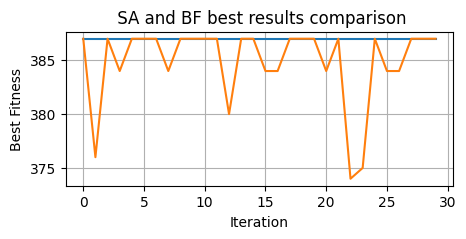

In [9]:
comparison(1000,200,10,0.6)


### Brute force for 29 items took 32 mins

In [16]:
n_items = 29
area = 50

prices = [random.randint(1, area) for _ in range(n_items)]
weights = [random.randint(1, area) for _ in range(n_items)]

tbl = PrettyTable()
tbl.field_names = ["ID","Prices", "Weight"]

for i in range(n_items):
    tbl.add_row([i, prices[i], weights[i]])

tbl.add_row(["---","------", "------"])
tbl.add_row(["Suma", sum(prices), sum(weights)])
print(tbl)

KS_BF_history, best_fitness_bf, best_combination, weights_of_best_combination = knapsack_brute_force(prices, weights, 200)

+------+--------+--------+
|  ID  | Prices | Weight |
+------+--------+--------+
|  0   |   38   |   15   |
|  1   |   24   |   19   |
|  2   |   12   |   28   |
|  3   |   43   |   24   |
|  4   |   17   |   25   |
|  5   |   35   |   2    |
|  6   |   42   |   50   |
|  7   |   36   |   36   |
|  8   |   43   |   2    |
|  9   |   38   |   38   |
|  10  |   10   |   21   |
|  11  |   2    |   9    |
|  12  |   20   |   43   |
|  13  |   49   |   3    |
|  14  |   14   |   19   |
|  15  |   37   |   14   |
|  16  |   48   |   49   |
|  17  |   8    |   36   |
|  18  |   41   |   3    |
|  19  |   46   |   31   |
|  20  |   33   |   32   |
|  21  |   26   |   17   |
|  22  |   36   |   10   |
|  23  |   42   |   39   |
|  24  |   16   |   41   |
|  25  |   7    |   11   |
|  26  |   49   |   8    |
|  27  |   44   |   19   |
|  28  |   44   |   13   |
| ---  | ------ | ------ |
| Suma |  900   |  657   |
+------+--------+--------+


In [18]:
print(best_fitness_bf, best_combination)

573 [0, 3, 5, 8, 13, 15, 18, 19, 21, 22, 23, 26, 27, 28]


### For 30 items it did not reach solutions even after 11 hours